In [1]:
# importing important python libaries
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load and read dataset
dataset = pd.read_csv("Reddit_Data.csv")
df = dataset.copy()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
# check the dataframe shape. To know the number of rows and columns
df.shape


(37249, 2)

In [5]:
# check the data informations, to know the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
# check for missing values
df.isnull().sum()

,0
clean_comment,100
category,0


In [7]:
# view rows with missing values
df[df['clean_comment'].isnull()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [8]:
# remove missing values
df.dropna(inplace=True)

df.isnull().sum()

,0
clean_comment,0
category,0


In [9]:
# check for duplicate in the data
df.duplicated().sum()

np.int64(350)

In [10]:
# remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [11]:
# check comments that contians whitespaces
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [12]:
# remove rows that contains whitespaces
df = df[~(df['clean_comment'].str.strip() == '')]

# recheck to confirm
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category


In [13]:
# convert the 'clean_comment' column to lowercase

df['clean_comment'] = df['clean_comment'].str.lower()

# verify the transformation by displaying the frst few rows
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [14]:
# showing rows with empty space at start and end of the comment
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [15]:
# remove the trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

#verify the transformation by checking for any remaining trailing whitespaces
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [16]:
# chcek comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# display the comments containing URLs
comments_with_urls.head()

,clean_comment,category


In [17]:
# check comments containing new line characters
comments_with_newlines = df[df['clean_comment'].str.contains('\n')]

# display the comments containing new line characters
comments_with_newlines.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [18]:
# replace new line characters in the clean commnet column with space
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# verify the transformation by checking for any remaining new lines
df[df['clean_comment'].str.contains('\n')]

,clean_comment,category


Exploratory Data Analysis, EDA

In [19]:
#  import important libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

category
 1    15771
 0    12772
-1     8250
Name: count, dtype: int64


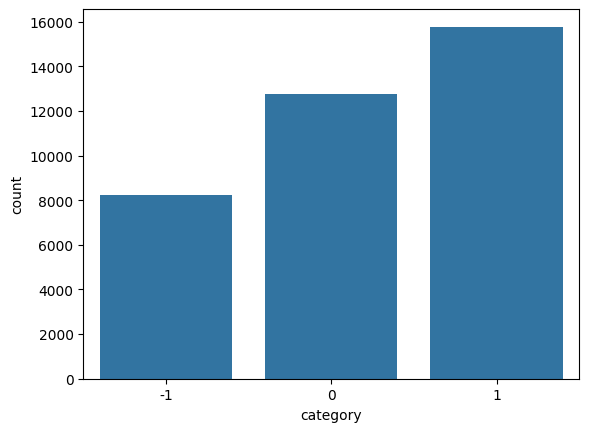

In [20]:
# class distribution
print(df['category'].value_counts())

sns.countplot(data = df, x = "category")
plt.show()

In [21]:
# How many words in a comment
df['word_count'] = df['clean_comment'].apply(lambda x: len(str(x).split()))

In [22]:
df.sample(5)

,clean_comment,category,word_count
15743,what,0,1
36058,tulsi should not the debates her lukewarm comm...,-1,54
4591,source for,0,2
19794,don usually agree with the thackerays but thei...,1,16
13856,jokes you vegetarian,0,3


In [23]:
# show statistical description
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


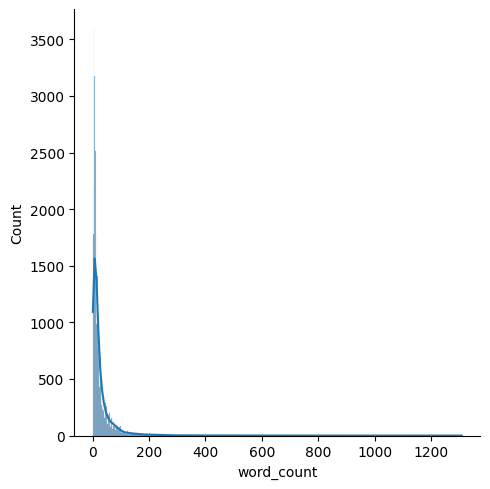

In [24]:
# display the word count in a distribution plot
sns.displot(df['word_count'], kde=True)
plt.show()

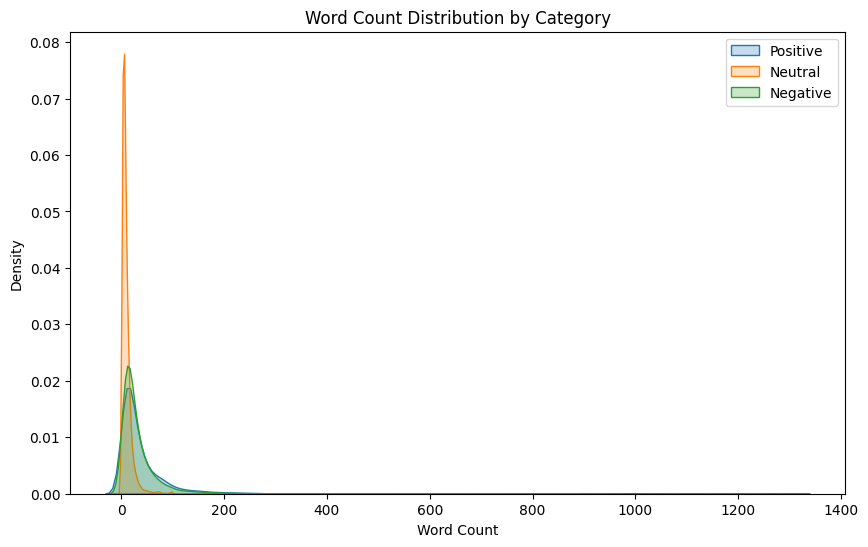

In [25]:
# color gradient with respect to positive, neutral, and negative comment
plt.figure(figsize=(10,6))

# plot kde for category 1
sns.kdeplot(df[df['category']==1]['word_count'], label='Positive', fill=True)

# plot kde for category 0
sns.kdeplot(df[df['category']==0]['word_count'], label='Neutral', fill=True)

# plot kde for category -1
sns.kdeplot(df[df['category']== -1]['word_count'], label='Negative', fill=True)

#add title, labels  and legend
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

Positive comment (category 1): The distribution shows that the comments have a wider spread in the word count indicating that longer comments are more common in the positive sentiments.

Neural comments (category 0): The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to the negative or positive ones.

Negative comments (category-1): These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments


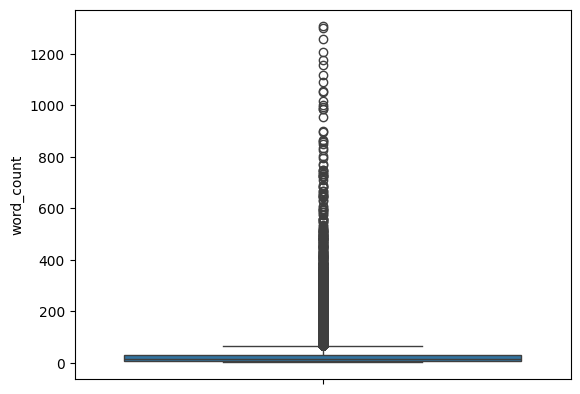

In [26]:
# Displaying the word count in boxplot
sns.boxplot(df['word_count'])
plt.show()

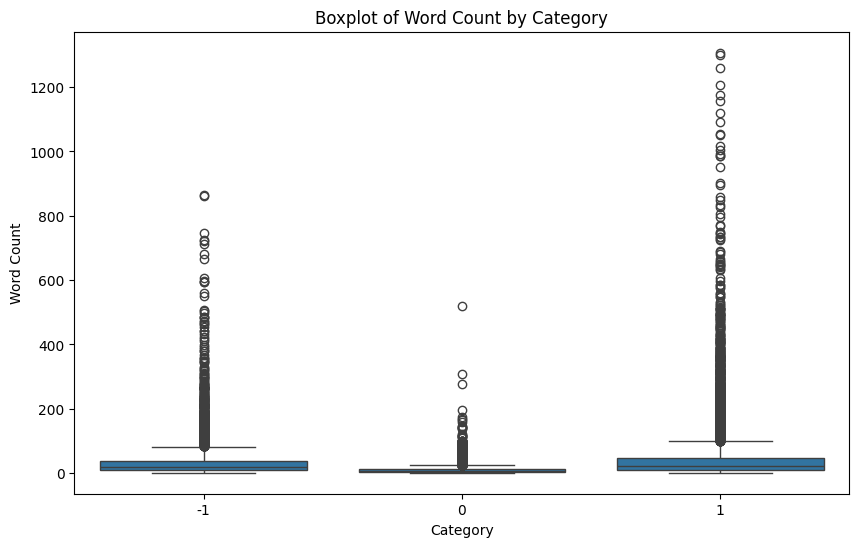

In [27]:
# Create a boxplot for the 'word_cound' column categorized by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='word_count', data=df)
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()


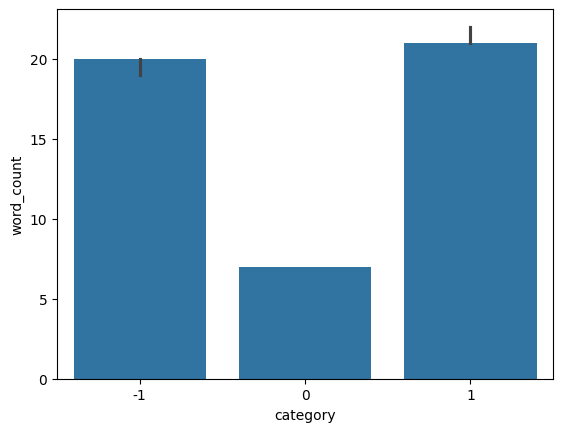

In [28]:
# median word counts among sentiments
sns.barplot(x='category', y='word_count', data=df, estimator='median')
plt.show()

In [29]:
!pip install nltk

In [30]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# define the list of English stopwords
stop_words = set(stopwords.words('english'))

# create a new coloumn to count the number of stopwords in each comment
df['stopword_count'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df.sample(5)

,clean_comment,category,word_count,stopword_count
18195,not shocking all would have thought that this ...,1,10,5
22022,inc jds 114 already have crossed majority mark...,0,21,5
2008,will sorely disappointed sounders fans everywh...,-1,19,7
12413,word that 200 300 crores were spent advt campa...,1,23,5
24359,2yeon otp,0,2,0


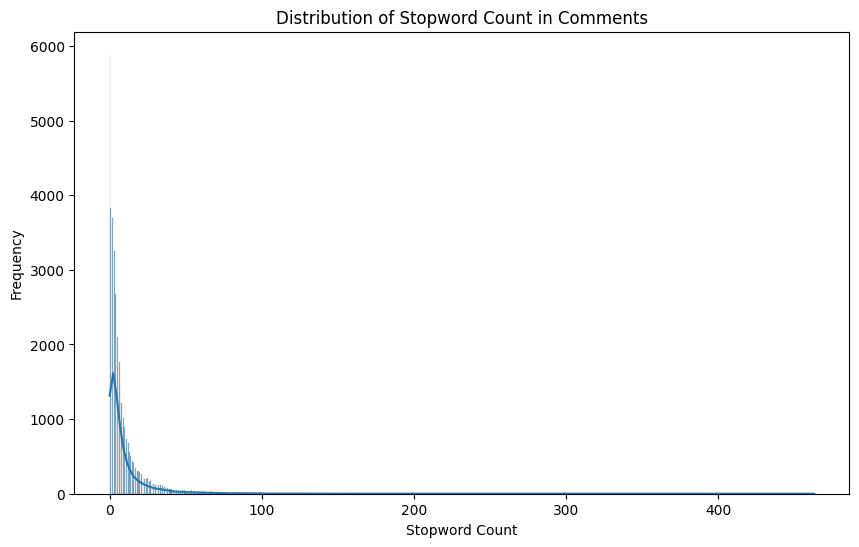

In [32]:
# create a distribution plot (histplot) for the 'stopword_count'
plt.figure(figsize=(10,6))
sns.histplot(df['stopword_count'], kde=True)
plt.title('Distribution of Stopword Count in Comments')
plt.xlabel('Stopword Count')
plt.ylabel('Frequency')
plt.show()

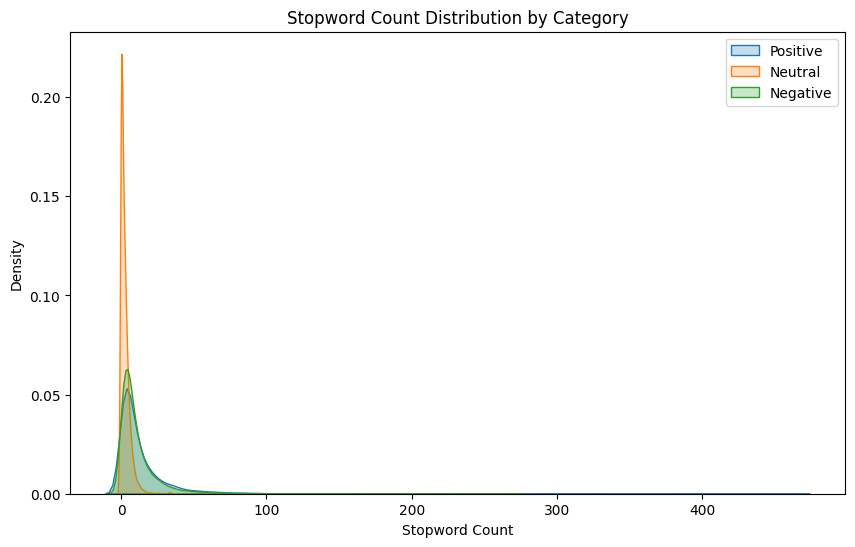

In [33]:
# color gradient for stopwords with respect to positive, neutral, and negative comment
plt.figure(figsize=(10,6))

# plot kde for category 1
sns.kdeplot(df[df['category']==1]['stopword_count'], label='Positive', fill=True)

# plot kde for category 0
sns.kdeplot(df[df['category']==0]['stopword_count'], label='Neutral', fill=True)

# plot kde for category -1
sns.kdeplot(df[df['category']== -1]['stopword_count'], label='Negative', fill=True)

#add title, labels  and legend
plt.title('Stopword Count Distribution by Category')
plt.xlabel('Stopword Count')
plt.ylabel('Density')
plt.legend()
plt.show()

/tmp/ipython-input-3156041474.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Stopword', data=most_common_stopwords_df, palette = 'viridis')


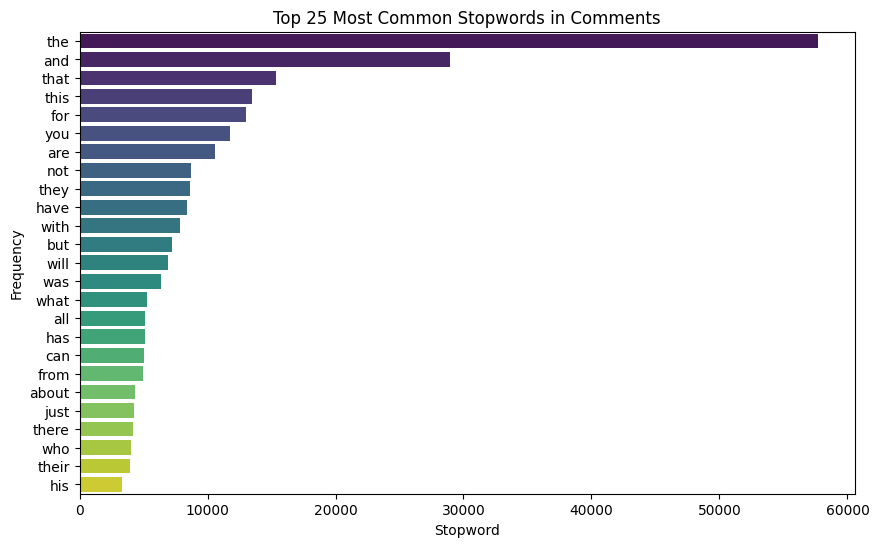

In [34]:
# create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# extract all stop words from the comments using previously defined stop words
all_stopwords = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# count the most common stop words
most_common_stopwords =  Counter(all_stopwords).most_common(25)

# convert the most common stop words to dataframe for visualization
most_common_stopwords_df = pd.DataFrame(most_common_stopwords, columns=['Stopword', 'Frequency'])

# create the barplot for the top 25 most common stop words
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Stopword', data=most_common_stopwords_df, palette = 'viridis')
plt.title('Top 25 Most Common Stopwords in Comments')
plt.xlabel('Stopword')
plt.ylabel('Frequency')
plt.show()


In [35]:
# calculating the number of characters in each comment
df['num_chars'] =df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,stopword_count,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [36]:
# checking the descriptive info for the len of the characters
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [37]:
from collections import Counter

# combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# count the frequency of each character
char_freq = Counter(all_text)

# convert the character frequency into dataframe for better display
char_freq_df = pd.DataFrame(char_freq.items(), columns= ['character', 'frequency']).sort_values(by= 'frequency', ascending=False)


In [38]:
char_freq_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [39]:
char_freq_df.tail(10)

,character,frequency
1340,遥,1
1341,则,1
1342,豹,1
1343,皿,1
1344,煮,1
1345,唯,1
1346,统,1
1330,段,1
1331,她,1
1332,谁,1


In [40]:
# count punctuation charaters in each comment
df['num_pun_char'] = df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))

df.sample(5)

,clean_comment,category,word_count,stopword_count,num_chars,num_pun_char
20163,1984 george orwell,0,3,0,18,0
8935,hmmm thinking can make this work,0,6,2,32,0
13773,has that post been deleted from the jayadev fe...,1,42,21,250,0
8385,1ppr eric ebron indiana vance mcdonald,0,6,0,38,0
11220,better him than anybody else public schools th...,1,75,32,463,0


In [41]:
# check the decription of the punctuation characters
df['num_pun_char'].describe()

,num_pun_char
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-1167227732.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=top_25_bigrams_df, palette = 'magma')


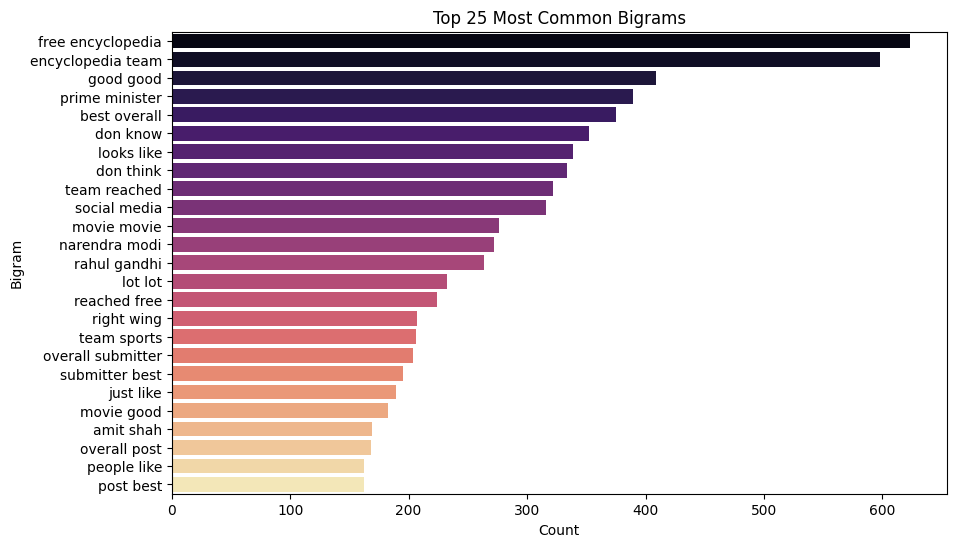

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
  return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], n=25)

# convert the bigrams into a dataframe for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# plot the countplot for the top 25 bigrams
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='bigram', data=top_25_bigrams_df, palette = 'magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

/tmp/ipython-input-2017732939.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trigram', data=top_25_trigrams_df, palette = 'coolwarm')


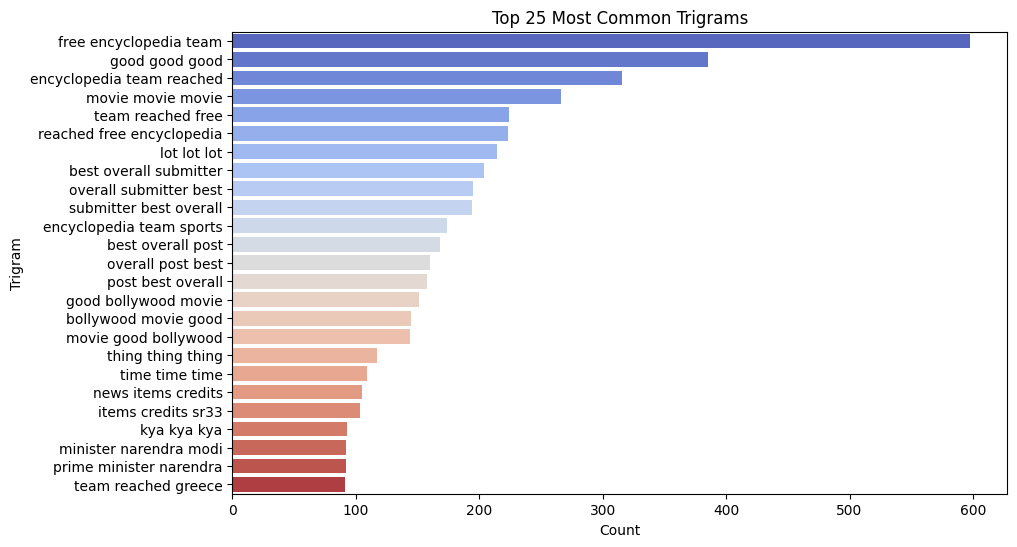

In [43]:
# create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
  return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], n=25)

# convert the tiigrams into a dataframe for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# plot the countplot for the top 25 bigrams
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='trigram', data=top_25_trigrams_df, palette = 'coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()


In [44]:
# remove non-english characters from the 'clean_comment' column
# keeping only standard english letters, digits and common punctuations
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [45]:
# combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# count the frequency of each character
char_freq = Counter(all_text)

# convert the character frequency into dataframe for better display
char_freq_df = pd.DataFrame(char_freq.items(), columns= ['character', 'frequency']).sort_values(by= 'frequency', ascending=False)

char_freq_df


,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [46]:
df.head()

,clean_comment,category,word_count,stopword_count,num_chars,num_pun_char
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [49]:
# defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not','but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining the essential ones
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))



In [50]:
df.head()

,clean_comment,category,word_count,stopword_count,num_chars,num_pun_char
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [51]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# define the Lemmantizer
# the lemmantizer helps to retain the root word
lemmatizer = WordNetLemmatizer()

# apply the lemmatization to the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,stopword_count,num_chars,num_pun_char
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


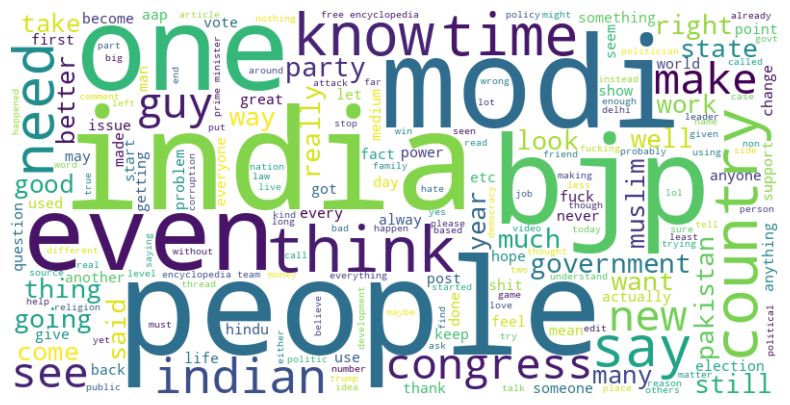

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

plot_word_cloud(df['clean_comment'])

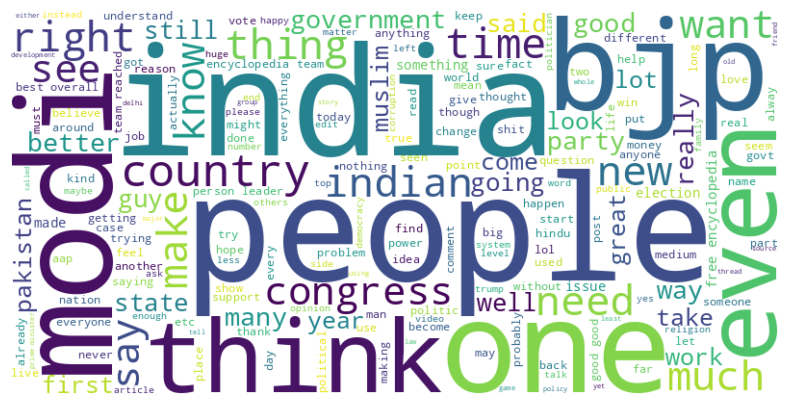

In [56]:
# showing word cloud for category with positive sentiment
plot_word_cloud(df[df['category']==1]['clean_comment'])


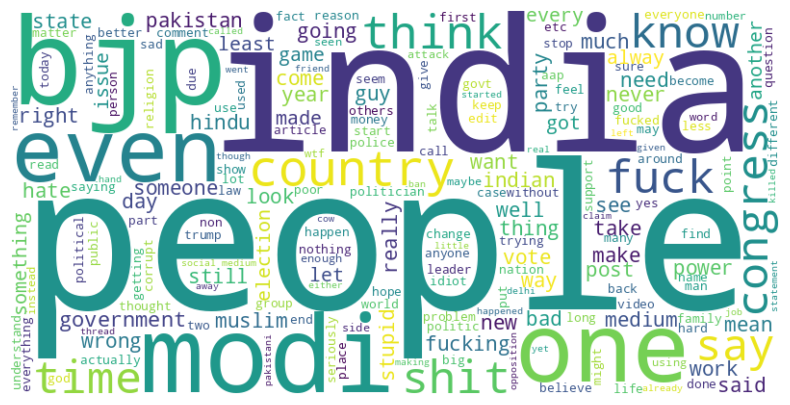

In [57]:
# showing word cloud for category with positive sentiment
plot_word_cloud(df[df['category']==-1]['clean_comment'])

/tmp/ipython-input-2916304228.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


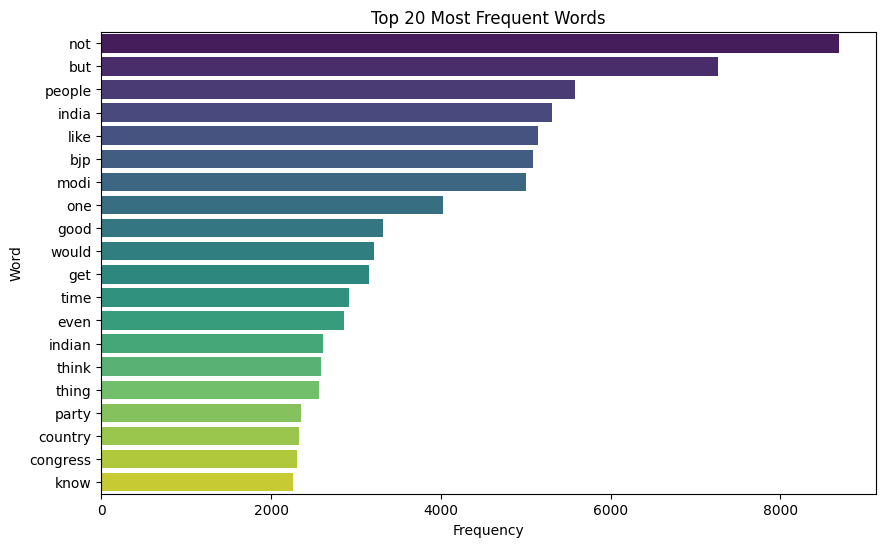

In [58]:
# to see the most occuring words in the data

def plot_top_n_words(df, n=20):
  """Plot the top N most frequent words in the dataset."""
  # Flatten all words in the content column
  words = ' '.join(df['clean_comment']).split()

  # Count the frequency of each word
  word_counts = Counter(words)

  # Get the most common words
  most_common_words = word_counts.most_common(n)

  # Extract the words and their counts
  words, counts = zip(*most_common_words)\

  # plot the Top N words
  plt.figure(figsize=(10,6))
  sns.barplot(x=list(counts), y=list(words), palette='viridis')
  plt.title(f'Top {n} Most Frequent Words')
  plt.xlabel('Frequency')
  plt.ylabel('Word')
  plt.show()

plot_top_n_words(df, n=20)

In [61]:
def plot_top_n_words_by_category(df, n=20, start=0):
  """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
  # Flatten all words in the comment column and count their occurrence by category
  word_category_counts = {}

  for idx, row in df.iterrows():
    words = row['clean_comment'].split()
    category = row['category']

    for word in words:
      if word not in word_category_counts:
        word_category_counts[word] = {-1: 0, 0: 0, 1: 0} #initialize counts for each sentiment category

      # increment the count for corresponding sentiment category
      word_category_counts[word][category] += 1

  # get total counts across all categories for each word
  total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

  # get the top N most frequent words across all categories
  most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start: start+n]
  top_words = [word for word, _ in most_common_words]

  # prepare data for plotting
  word_labels = top_words
  negative_counts = [word_category_counts[word][-1] for word in top_words]
  neutral_counts = [word_category_counts[word][0] for word in top_words]
  positive_counts = [word_category_counts[word][1] for word in top_words]

  # create the stacked bar plot
  plt.figure(figsize=(12,8))
  bar_width = 0.75

  # plot negative, neutral, and positive counts in a stacked manner
  plt.barh(word_labels, negative_counts, height=bar_width, label='Negative (-1)', color='red')
  plt.barh(word_labels, neutral_counts, height=bar_width, left=negative_counts, label='Neutral (0)', color='grey')
  plt.barh(word_labels, positive_counts, height=bar_width, left=[i+j for i, j in zip(negative_counts, neutral_counts)], label='Positive (1)', color='green')

  plt.title(f'Top {n} Most Frequent Words with stacked Sentiment Categories')
  plt.xlabel('Frequency')
  plt.ylabel('Word')
  plt.legend(title = 'Seentiment', loc= 'lower right')
  plt.gca().invert_yaxis() # invert y axis to show the highest frquency at the top
  plt.show()


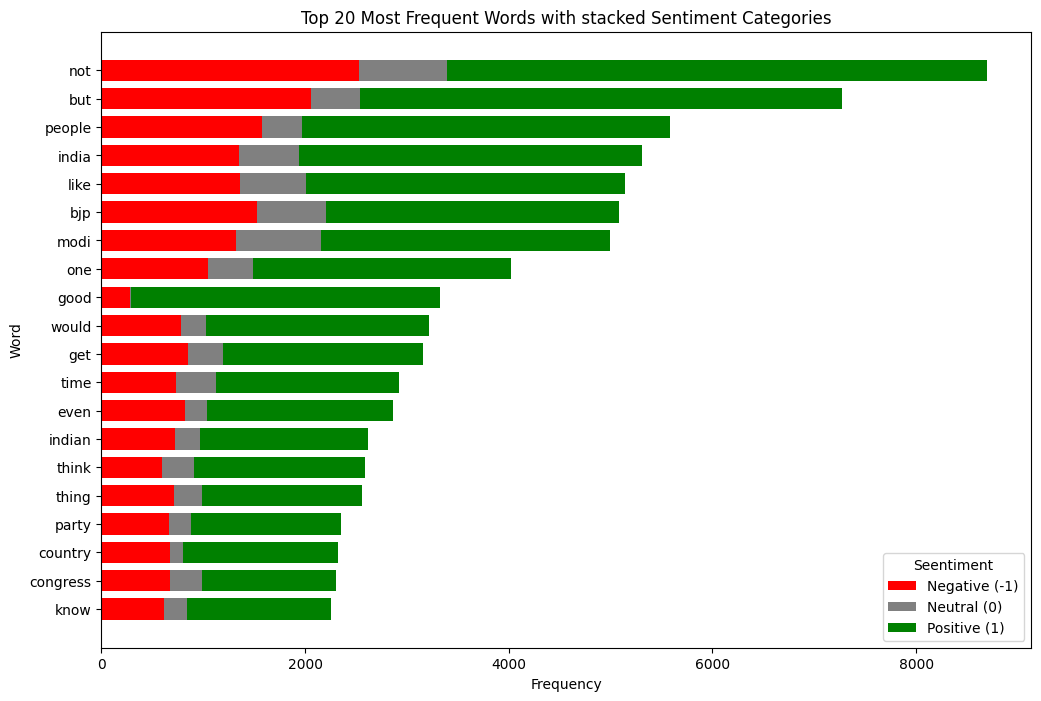

In [62]:
plot_top_n_words_by_category(df, n=20)